# Homework 3: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'huangmy'

## 0. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

"This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed."

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# Read three kinds of rankings data
USvideos = pd.read_csv("data/homework3/USvideos.csv")
USvideos = USvideos.dropna()
GBvideos = pd.read_csv("data/homework3/GBvideos.csv")
GBvideos = GBvideos.dropna()
FRvideos = pd.read_csv("data/homework3/FRvideos.csv")
FRvideos = FRvideos.dropna()
DEvideos = pd.read_csv("data/homework3/DEvideos.csv")
DEvideos = DEvideos.dropna()
CAvideos = pd.read_csv("data/homework3/CAvideos.csv")
CAvideos = CAvideos.dropna()

# deal with data properly
USvideos.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


### Q1. For 10 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

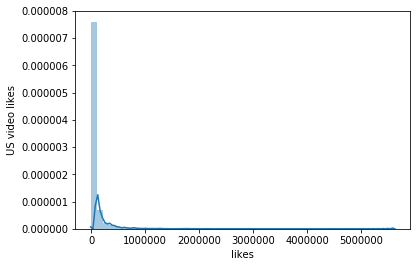

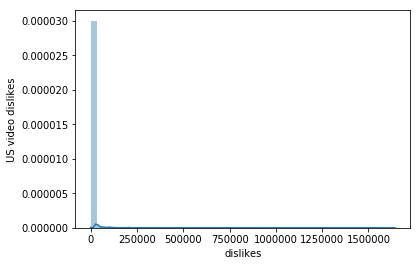

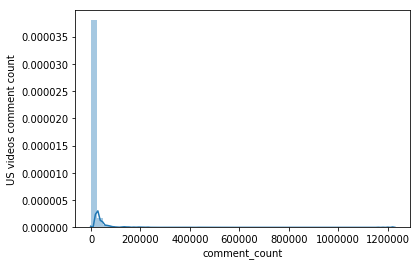

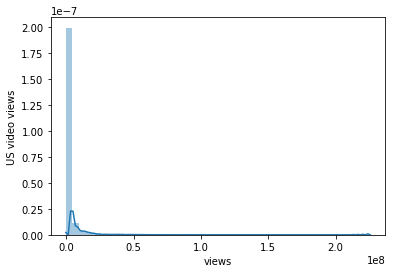

In [3]:
# plot histograms first
ax = sns.distplot(USvideos.likes)
ax.set_ylabel("US video likes")
plt.show()
ax = sns.distplot(USvideos.dislikes)
ax.set_ylabel("US video dislikes")
plt.show()
ax = sns.distplot(USvideos.comment_count)
ax.set_ylabel("US videos comment count")
plt.show()
ax = sns.distplot(USvideos.views)
ax.set_ylabel("US video views")
plt.show()

### Comment:
* Four plots shown above indicate that all these four columns' samples are widely distributed. Percent values are higher in the first interval among these plots but they still take a small part of the whole. It seems that all these distributions are a little bit right skewed since they have quite heavy tails. Detailed distribution pattern difference is a little hard to tell since the range of horizontal coordinate is too large.

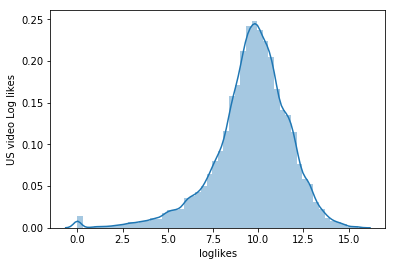

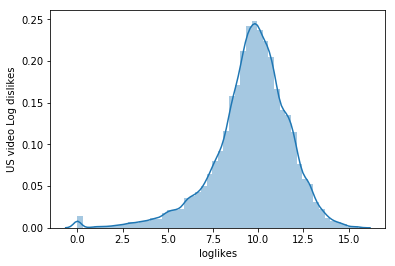

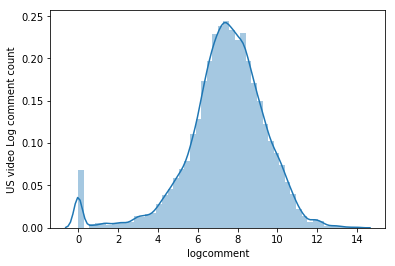

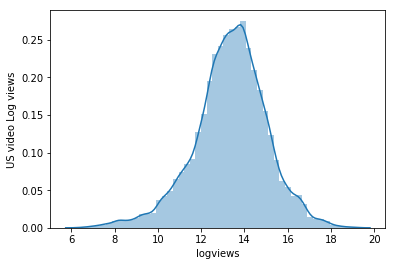

In [36]:
# Try to apply a log transformation and plot the histograms again
USvideos['loglikes'] = USvideos['likes'].apply(lambda x: math.log(x) if x>0 else 0)
ax = sns.distplot(USvideos.loglikes)
ax.set_ylabel("US video Log likes")
plt.show()
USvideos['logdislikes'] = USvideos['dislikes'].apply(lambda x: math.log(x) if x>0 else 0)
ax = sns.distplot(USvideos.loglikes)
ax.set_ylabel("US video Log dislikes")
plt.show()
USvideos['logcomment'] = USvideos['comment_count'].apply(lambda x: math.log(x) if x>0 else 0)
ax = sns.distplot(USvideos.logcomment)
ax.set_ylabel("US video Log comment count")
plt.show()
USvideos['logviews'] = USvideos['views'].apply(lambda x: math.log(x) if x>0 else 0)
ax = sns.distplot(USvideos.logviews)
ax.set_ylabel("US video Log views")
plt.show()

### Comment:
* After the shrinkage operation, the range of horizontal coordinate becomes much smaller among these four plots. Now these four updated plots indicate that these samples look like normal distribution. Although they are a little bit left skewed compared with normal distribution, they still have much in common. Compared with the previous plots, the updated ones do better in visualization.

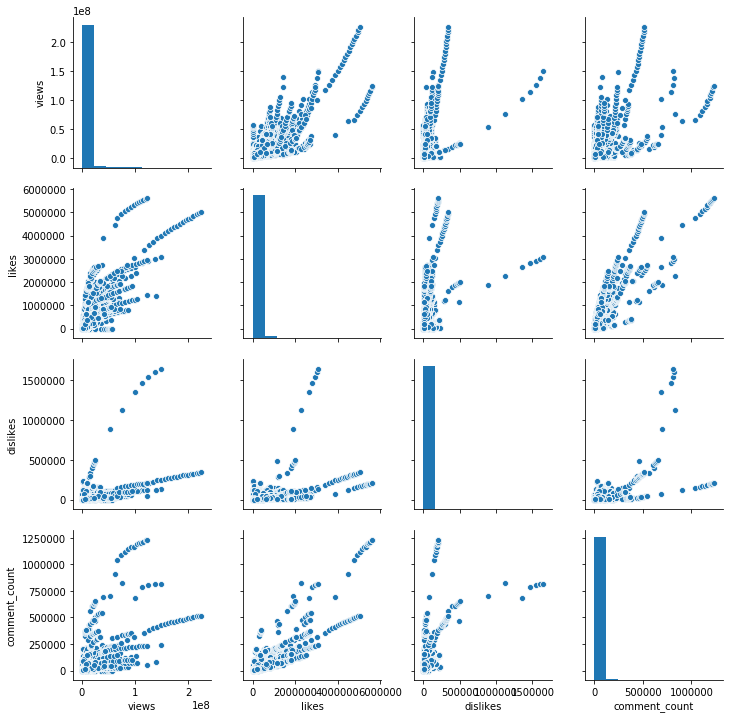

In [7]:
# Create a pairplot for the US as we did in this week's lab
USvideos_pair = USvideos[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(USvideos_pair)

### Comment:
* Here we give the pairplot for columns 'likes', 'dislikes', 'comment_count' and 'views'. The pairplot indicates that almost all these four features are positive correlated with each other. This obeservation makes sense since hot videos are more likely to have higher number of comments, likes and dislikes response.

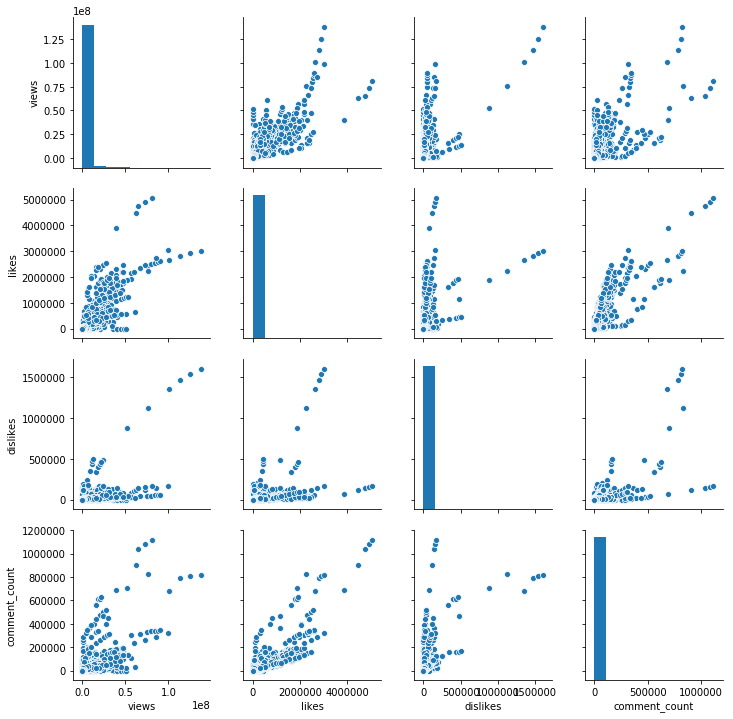

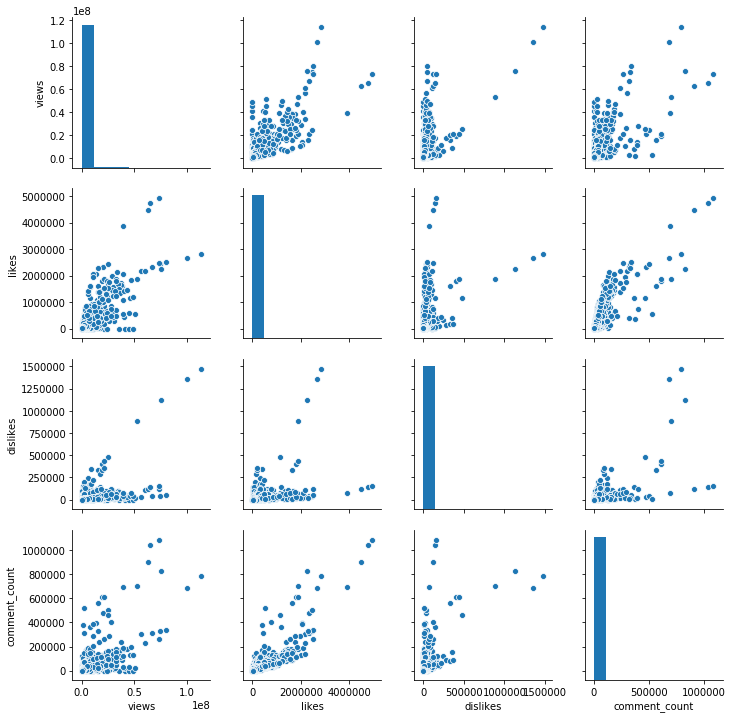

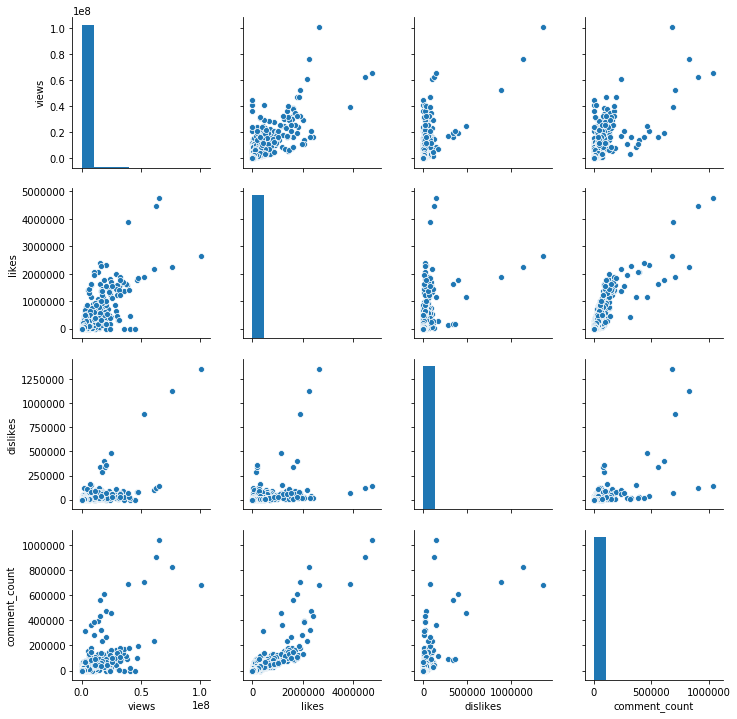

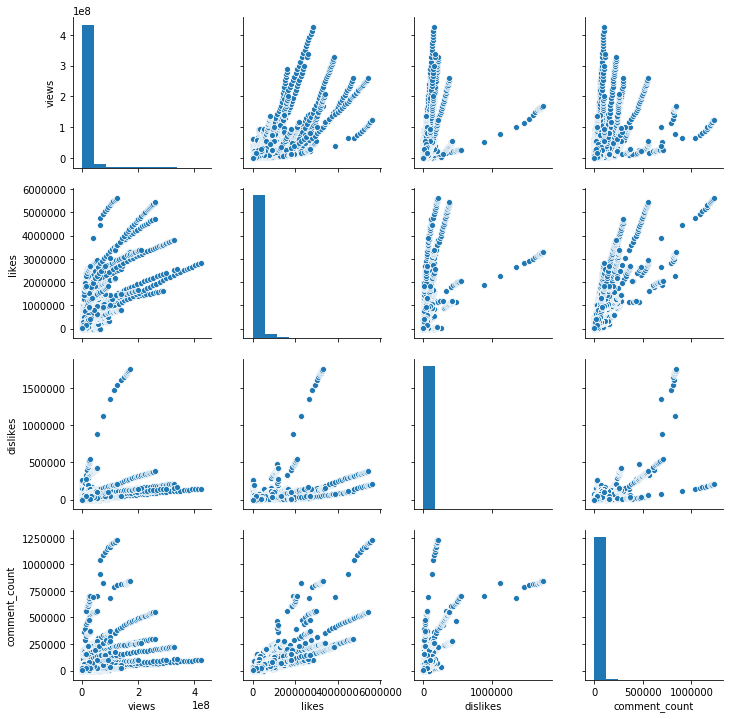

In [23]:
# Create additional pairplots for the other four regions.

CAvideos_pair = CAvideos[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(CAvideos_pair)
DEvideos_pair = DEvideos[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(DEvideos_pair)


FRvideos_pair = FRvideos[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(FRvideos_pair)
GBvideos_pair = GBvideos[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(GBvideos_pair)

### Comment:
* Here the pairplots of other four regions have been given above. Their pairplots are not totally the same but positive correlation of all these columns still remain in these four plots. This pattern is quite similar.

### Q2. Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

                  likes  dislikes  comment_count     views
likes          1.000000  0.514691       0.853380  0.848746
dislikes       0.514691  1.000000       0.623131  0.558108
comment_count  0.853380  0.623131       1.000000  0.655819
views          0.848746  0.558108       0.655819  1.000000


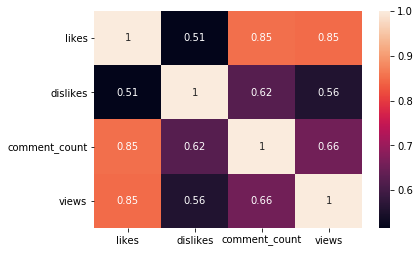

In [4]:
# correlation matrix
USvideos_heat = USvideos[['likes', 'dislikes', 'comment_count', 'views']]
correlation_matrix = USvideos_heat.corr()
print(correlation_matrix)
# create heatmap
sns.heatmap(correlation_matrix, annot=True)

### Comment：
* Here we use US region data set and its variables including 'likes', 'dislikes', 'views' and 'comment_count'.
* All these correlation coefficients are larger than 0.5, which indicates that these numerical variables are highly positive correlated.
* The correlation of 'likes' and 'comment_count' is 0.85 and it is the same as the one of 'likes' and 'views'. The correlation of 'comment_count' and 'views' is 0.66, which is also quite high compared with other correlation values in the map. All these patterns indicate that variables 'likes', 'comment_count' and 'views' are extremely highly correlated in this set.

### Q3. For 10 points: Create and compare OLS models using variables of your choice, for a region of your choice

* Use `statsmodels` to perform an ANOVA of a variable of your choice as the dependent variable (for example, *views*) and the *video category* as the independent variable. Provide your interpretation of the results.
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
# perform an ANOVA model
model1 = smf.ols('views ~ C(category_id)', data=USvideos).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sat, 06 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:32:44   Log-Likelihood:            -6.9493e+05
No. Observations:               40379   AIC:                         1.390e+06
Df Residuals:                   40363   BIC:                         1.390e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.112e+06   1.49e+05     20.871      0.000    2.82e+06     3.4e+06
C(category_id)[T.2]  -1.739e+06   3.99e+05     -4.354      0.000   -2.52e+06   -9.56e+05
C(category_id)[T.10]  3.098e+06   1.74e+05     17.793      0.000    2.76e+06    3.44e+06
C(category_id)[T.15] -2.278e+06   2.81e+05     -8.101      0.000   -2.83e+06   -1.73e+06
C(category_id)[T.17] -1.043e+06   2.16e+05     -4.825      0.000   -1.47e+06   -6.19e+05
C(category_id)[T.19] -2.258e+06   3.89e+05     -5.797      0.000   -3.02e+06   -1.49e+06
C(category_id)[T.20] -4.648e+05   2.95e+05     -1.576      0.115   -1.04e+06    1.13e+05
C(category_id)[T.22] -1.583e+06   1.98e+05     -7.993      0.000   -1.97e+06   -1.19e+06
C(category_id)[T.23] -1.628e+06   1.93e+05     -8.422      0.000   -2.01e+06   -1.25e+06
C(category_id)[T.24] -1.039e+06   1.66e+05     -6.262      0.000   -1.36e+06   -7.14e+05
C(category_id)[T.25] -2.511e+06   2.09e+05    -11.995      0.000   -2.92e+06    -2.1e+06
C(category_id)[T.26] -2.127e+06   1.87e+05    -11.403      0.000   -2.49e+06   -1.76e+06
C(category_id)[T.27] -2.393e+06   2.32e+05    -10.307      0.000   -2.85e+06   -1.94e+06
C(category_id)[T.28]  -1.73e+06    2.1e+05     -8.223      0.000   -2.14e+06   -1.32e+06
C(category_id)[T.29]  5.516e+04      1e+06      0.055      0.956   -1.91e+06    2.02e+06
C(category_id)[T.43] -2.209e+06   9.67e+05     -2.284      0.022    -4.1e+06   -3.13e+05
==============================================================================
Omnibus:                    70093.775   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         95679731.604
Skew:                          12.196   Prob(JB):                         0.00
Kurtosis:                     240.222   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comment:
* We perform an ANOVA model here using dependent variable 'views' and independent variable 'category_id'. This model's R-squared is 0.057, which indicates that the model fails to fit the data very well. By default, this model treats 'category_id' as separated dummy boolean variables and take the last level as intercept term. According to the output, the coefficients of intercept and all the category_id terms except for C(category_id).20 and C(category_id).29 are significant here in predicting 'views' under ANOVA model.

In [14]:
# Create two different regression models where the dependent variables are the same
# and the independent variables are different
model2 = smf.ols('views ~ likes', data=USvideos).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 1.040e+05
Date:                Sat, 06 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:02:56   Log-Likelihood:            -6.7040e+05
No. Observations:               40379   AIC:                         1.341e+06
Df Residuals:                   40377   BIC:                         1.341e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.22e+05   2.06e+04     15.664      0.000    2.82e+05    3.62e+05
likes         27.4584      0.085    322.517      0.000      27.292      27.625
==============================================================================
Omnibus:                    35784.215   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23570091.397
Skew:                           3.234   Prob(JB):                         0.00
Kurtosis:                     121.184   Cond. No.                     2.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comment:
* We use OLS to perform a regression model based on 'views' and 'likes'. This model's R-squared is 0.72, which indicates that the model fits the data well. Coefficients of intercept and 'likes' are 3.22e+05 and 27.4584. Both their p-values indicate that coefficients are significant in this model.

In [15]:
model3 = smf.ols('views ~ dislikes', data=USvideos).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                 1.827e+04
Date:                Sat, 06 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:03:07   Log-Likelihood:            -6.8859e+05
No. Observations:               40379   AIC:                         1.377e+06
Df Residuals:                   40377   BIC:                         1.377e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.743e+06    3.1e+04     56.189      0.000    1.68e+06     1.8e+06
dislikes     178.8971      1.324    135.154      0.000     176.303     181.491
==============================================================================
Omnibus:                    52107.066   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         61687781.721
Skew:                           6.487   Prob(JB):                         0.00
Kurtosis:                     194.042   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comment:
* We use OLS to perform a regression model based on 'views' and 'dislikes'. This model's R-squared is 0.311, which indicates that the model fails to fit the data very well compared with the previous model. Coefficients of intercept and 'dislikes' are 1.743e+06 and 178.8971. Both their p-values indicate that coefficients are significant in this model. 

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

In [42]:
pokemon = pd.read_csv("data/homework3/Pokemon.csv")
pokemon_pair = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_pair.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


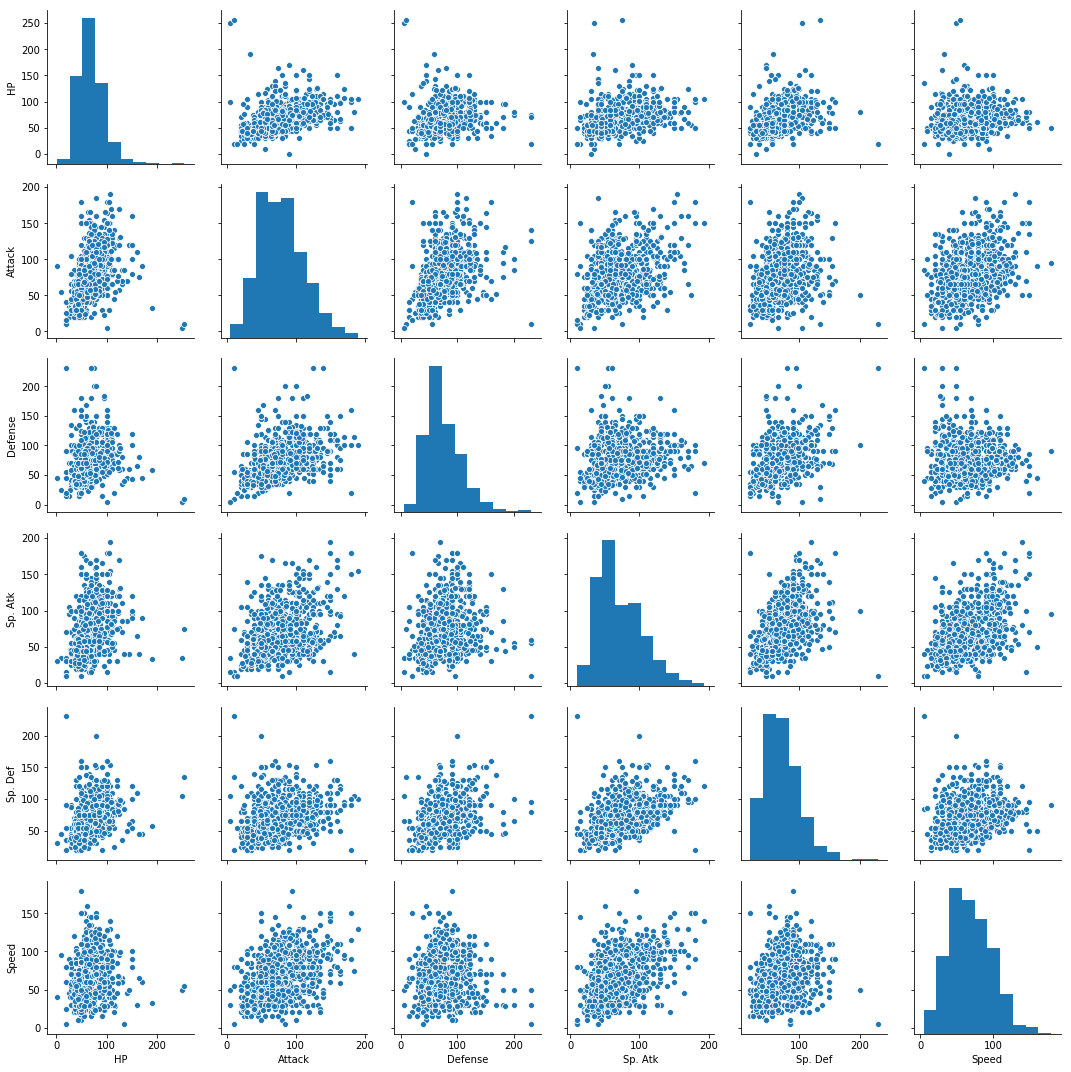

In [43]:
sns.pairplot(pokemon_pair)

### Comment:
* Here we give the pairplot for columns 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp,def' and 'Speed'. The pairplot indicates that most of these features are positive correlated. The correlation matrix has also been shown above. 'Defense' and 'Sp.Def' have the most correlation coefficient and the value is 0.510747. 'Speed' and 'Defense' have the least correlation coefficient and the value is 0.015227.

### Q5. For 10 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

['Grass', 'Fire', 'Bug', 'Normal', 'Poison', 'Water', 'Rock', 'Electric', 'Ghost', 'Ground', 'Psychic', 'Ice', 'Dragon', 'Fairy', 'Dark', 'Steel', 'Fighting', 'Flying']


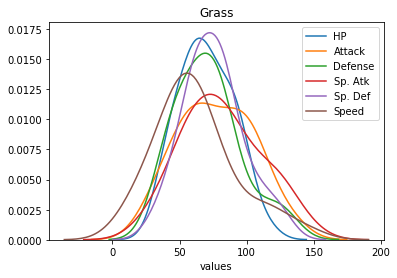

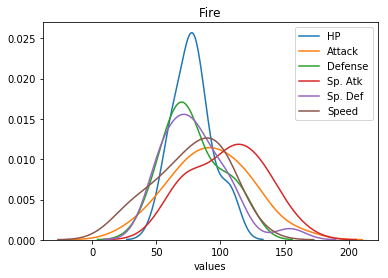

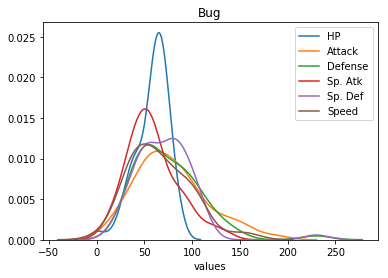

In [59]:
# plot the distribution of ability points
Type1_list = pokemon['Type 1'].unique().tolist()
Type2_list = pokemon['Type 2'].unique().tolist()
print(Type1_list)

ability_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

def typePlot(type_detail):
    temp = pokemon[pokemon["Type 1"] == type_detail]
    for j in range(len(ability_list)):
        index = temp.columns.get_loc(ability_list[j])
        ax = sns.distplot(temp.iloc[:, index], kde = True, hist=False, label=ability_list[j])
    ax.set_title(type_detail)
    ax.set_xlabel("values")
    plt.show()

for item in Type1_list[0:3]:
    typePlot(item)

### Comment:
* Here we plot different distributions of ability points for Type 'Grass', 'Fire' and 'Water'.

* Type 'Grass': 'HP', 'Sp.Def' and 'Defense' plots look like normal distribution. 'Attack' and 'Sp.Atk' plots look like uniform distribution. 'Speed' plot looks like normal distribution but it is a little bit right skewed compared with normal distribution. In this plot, 'Grass' pokemon has significantly different 'HP', 'Sp.Def' and 'Defense' abilities distributions in general.

* Type 'Fire': 'HP' plot looks like normal distribution. 'Attack', 'Speed' and 'Sp.Atk' plots look like uniform distribution.
'Sp.Def' and 'Defense' plots look like normal distribution but they are a little bit right skewed compared with normal distribution. In this plot, 'Fire' pokemon has significantly different 'HP', 'Sp.Def' and 'Defense' abilities distributions in general.

* Type 'Water': all these 6 plots look like normal distribution. In this plot, 'Water' pokemon has all similar abilities distributions.

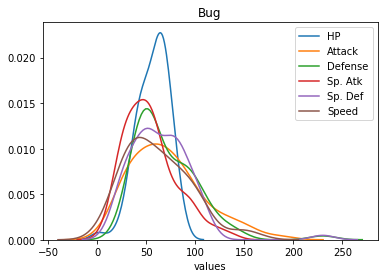

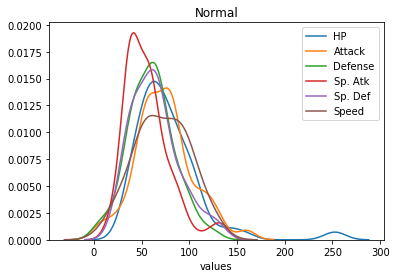

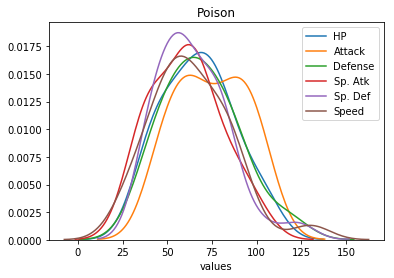

In [45]:
for item in Type1_list[3:6]:
    typePlot(item)

### Comment:
* Here we plot different distributions of ability points for Type 'Bug', 'Normal' and 'Poison'.

* Type 'Bug': 'HP', 'Sp.Atk' and 'Defense' plot look like normal distribution but they are a little bit right skewed compared with normal distribution. The other three plots look like uniform distribution. In this plot, 'Bug' pokemon has significantly different 'HP' ability distribution in general.

* Type 'Normal': 'Attack' and 'Sp.Atk' plot look like uniform distribution. The other four plots look like normal distribution but they are a little bit right skewed compared with normal distribution. In this plot, 'Normal' pokemon has significantly different 'Sp.Atk' ability distribution in general.

* Type 'Poison': 'Attack' plot looks like bimodal distribution. The other five plots look like normal distribution but they are a little bit right skewed compared with normal distribution. In this plot, 'Poison' pokemon has significantly different 'Sp.Def' ability distribution in general.

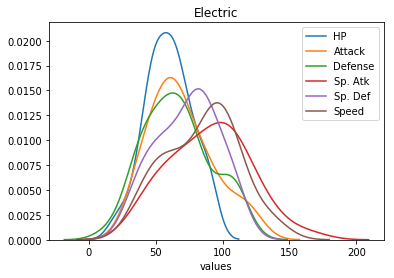

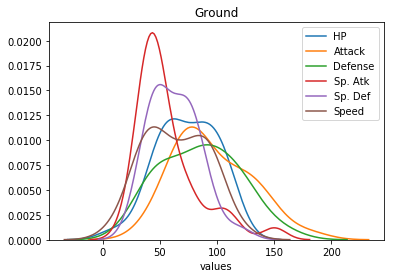

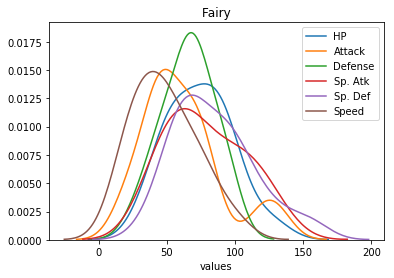

In [46]:
for item in Type1_list[6:9]:
    typePlot(item)

### Comment:
* Here we plot different distributions of ability points for Type 'Electric', 'Ground' and 'Fairy'.

* Type 'Electric': 'HP' plot looks like normal  distribution. 'Attack' and 'Defense' plots look like normal distribution but they are a little bit right skewed compared with normal distribution. The other three plots look like normal distribution but they are a little bit left skewed. In this plot, 'Electric' pokemon has significantly different 'HP' ability distribution in general.

* Type 'Ground': 'Sp.Atk' plot looks like normal distribution but it is a little bit right skewed. 'Speed' plot looks like bimodal distribution. The other four plots look like uniform distribution. In this plot, 'Ground' pokemon has significantly different 'Sp.Atk' ability distribution in general.

* Type 'Fairy': 'Defense' plot looks like bimodal distribution. 'Speed' plot looks like normal distribution but it is a little bit right skewed. 'Attack' plot looks like bimodal distribution. The other three plots look like uniform distribution. In this plot, 'Fairy' pokemon has significantly different 'Defense' ability distribution in general.

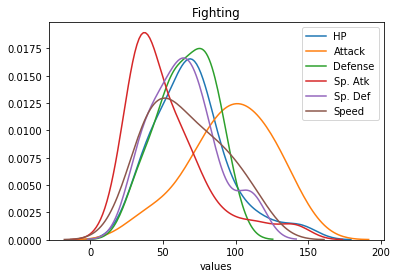

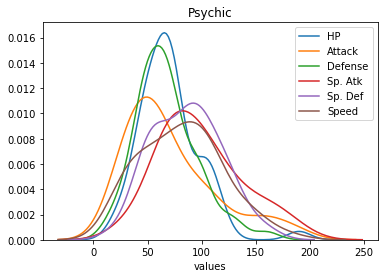

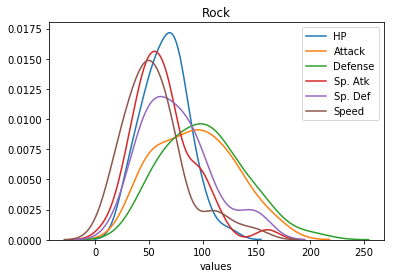

In [47]:
for item in Type1_list[9:12]:
    typePlot(item)

### Comment:
* Here we plot different distributions of ability points for Type 'Fighting', 'Psychic' and 'Rock'.

* Type 'Fighting': 'Attack' plot looks like normal distribution but it is a little bit left skewed compared with normal distribution. The other five plots look like normal distribution but they are a little bit right skewed. In this plot, 'Fighting' pokemon has significantly different 'Sp.Atk' ability distribution in general.

* Type 'Psychic': 'Sp.Atk', 'Attack', 'HP' and 'Defense' plots look like normal distribution but they are a little bit right skewed. The other two plots look like uniform distribution. In this plot, 'Psychic' pokemon has significantly different 'HP' and 'Defense' abilities distributions in general.

* Type 'Rock': 'Attack' plot looks like uniform distribution. The other five plots look like normal distribution but they are a little bit right skewed. In this plot, 'Rock' pokemon has significantly different 'HP' ability distribution in general.

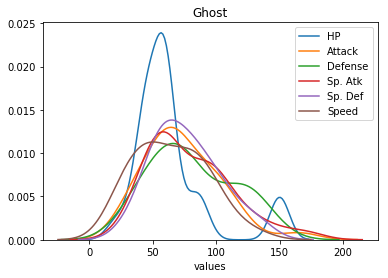

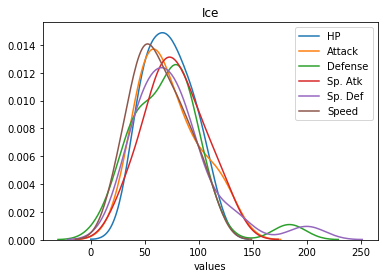

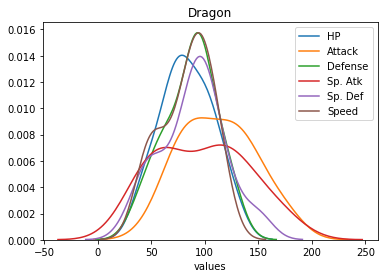

In [48]:
for item in Type1_list[12:15]:
    typePlot(item)

### Comment:
* Here we plot different distributions of ability points for Type 'Ghost', 'Ice' and 'Dragon'.

* Type 'Ghost': 'HP' plot looks like bimodal distribution. 'Speed'plot looks like uniform distribution. The other four plots look like normal distribution but they are a little bit right skewed. In this plot, 'Ghost' pokemon has significantly different 'HP' ability in general.

* Type 'Ice': all these plots look like normal distribution but all of them are a little bit right skewed. In this plot, all 'Ice' pokemon's abilities are quite similar to each other.

* Type 'Dragon': 'HP' plot looks like normal distribution but it is a little bit right skewed. 'Defense' plot looks like normal distribution. 'Attack' and 'Sp.Atk' plots look like uniform distribution. The other two plots look like normal distribution but they are a little bit left skewed.

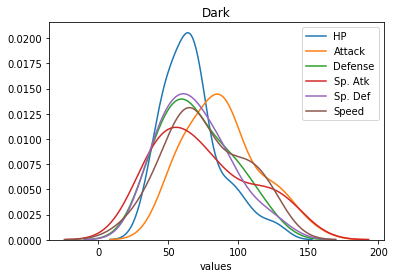

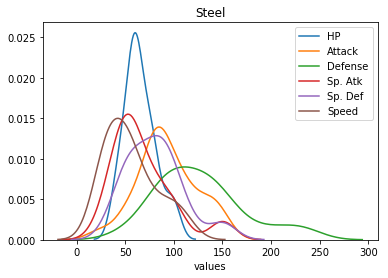

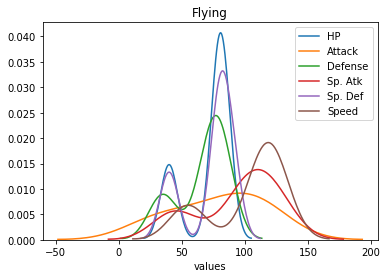

In [49]:
for item in Type1_list[15:len(Type1_list)]:
    typePlot(item)

### Comment:
* Here we plot different distributions of ability points for Type 'Dark', 'Steel' and 'Flying'.

* Type 'Dark': all these plots look like normal distribution but all of them are a little bit right skewed. In this plot, 'Dark' pokemon has significantly different 'HP' ability distribution in general.

* Type 'Steel': 'Sp.Def' plot looks like uniform distribution. The other five plots look like normal distribution but all of them are a little bit right skewed. In this plot, 'Steel' pokemon has significantly different 'HP' ability distribution in general.

* Type 'Flying': 'Attack' plot looks like normal distribution but it is a little bit left skewed. The other five plots look like bimodal distribution. In this plot, 'Flying' pokemon has significantly different 'Attack' ability distribution in general.

### Q6. For 10 Points: How the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

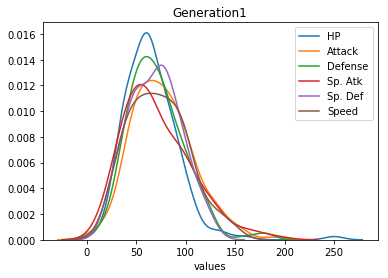

In [50]:
generation_list = pokemon.Generation.unique().tolist()
ability_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

def generationPlot(generation_index):
    # plot figures
    temp = pokemon[pokemon.Generation == generation_index]
    for j in range(len(ability_list)):
        index = temp.columns.get_loc(ability_list[j])
        ax = sns.distplot(temp.iloc[:, index], kde = True, hist=False, label = ability_list[j])
        # set label for each generation
    ax.set_title("Generation" + str(generation_index))
    ax.set_xlabel("values")
    plt.show() 

# Generation 1 plots
generationPlot(1)

#### Comment for Generation 1:
* Here we plot the distribution of 6 columns including 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def' and 'Speed' for Generation 1. According to the plot shown above, we found that all plots look like normal distribution but they are a little bit right skewed compared with normal distribution.

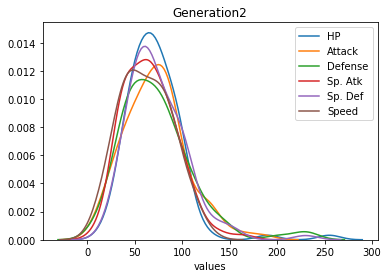

In [51]:
# Generation 2 plots
generationPlot(2)

#### Comment for Generation 2:
* Here we plot the distribution of 6 columns including 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def' and 'Speed' for Generation 2. According to the plot shown above, we found that all plots look like normal distribution but they are still a little bit right skewed compared with normal distribution.

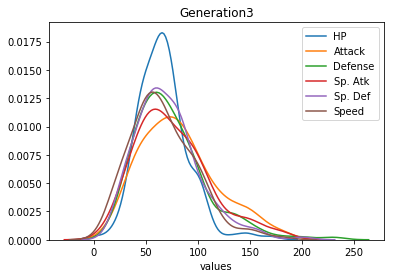

In [52]:
# Generation 3 plots
generationPlot(3)

#### Comment for Generation 3:
* Here we plot the distribution of 6 columns including 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def' and 'Speed' for Generation 3. According to the plot shown above, we found that almost all the plots look like normal distribution but all of them are a little bit right skewed here. And the distribution of 'HP' is significantly different from others in this plot.

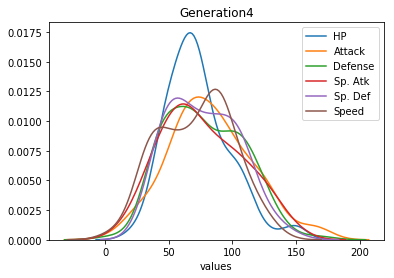

In [53]:
# Generation 4 plots
generationPlot(4)

#### Comment for Generation 4:
* Here we plot the distribution of 6 columns including 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def' and 'Speed' for Generation 4. According to the plot shown above, we found that 'Sp.Def', 'Speed' and 'Defense' look like bimodal distribution and others look like normal distribution but they are a little bit right skewed compared with normal distribution.

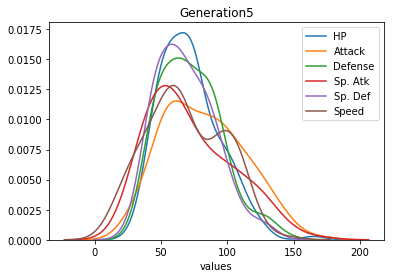

In [54]:
# Generation 5 plots
generationPlot(5)

#### Comment for Generation 5:
* Here we plot the distribution of 6 columns including 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def' and 'Speed' for Generation 5. According to the plot shown above, we found that 'HP', 'Sp.Atk', 'Sp.Def' and 'Defense' look like normal distribution but they are a little bit right skewed compared with normal distribution. 'Attack' look like uniform distribution and 'Speed' look like bimodal distribution.

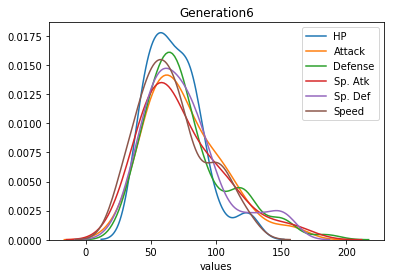

In [55]:
# Generation 6 plots
generationPlot(6)

#### Comment for Generation 6:
* Here we plot the distribution of 6 columns including 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def' and 'Speed' for Generation 6. According to the plot shown above, we found that almost all the plots look like normal distribution but all of them are a little bit right skewed here.

### Comment based on all these distribution plots:
* Based on all the analysis mentioned above, we can conclude that most of the distributions still keep the same in each generation. The distribution of one or two abilities may change within different generation. Generally speaking, the designer still keeps distributions of abilities the same in each generation and change a little bit sometimes.

### Q7. *Bonus* – For 5 Points: Which ability points were significantly different per Pokémon type?

In [82]:
import scipy.stats as stats 
import numpy as np

pokemon = pokemon.dropna()
def filGenType(Type):
    return pokemon[pokemon["Type 1"] == Type] 

def findMostDiff(Type):
    operFrame = filGenType(Type)
    matrix = np.zeros((len(ability_list), len(ability_list)))
    count_significant_list = []
    sig_different_ability_list = []
    for i in range(len(ability_list)):
        indexi = operFrame.columns.get_loc(ability_list[i])
        x = operFrame.iloc[:, indexi].tolist()
        count = 0
        for j in range(len(ability_list)):
            indexj = operFrame.columns.get_loc(ability_list[j])
            y = operFrame.iloc[:, indexj].tolist()
            r, p = stats.pearsonr(x,y)
            matrix[i][j] = p
            if p < 0.05:
                count = count + 1
        count_significant_list.append(count)
    # turn count most large siginificant num back to its ability
    for i in range(len(count_significant_list)):
        if count_significant_list[i] == max(count_significant_list):
            sig_different_ability_list.append(ability_list[i])
    return sig_different_ability_list

print(ability_list)
# define a dictionary to record all types' different abilities
dic = {}
for item in Type1_list:
    dic[item] = findMostDiff(item)
dic

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


{'Grass': ['HP', 'Sp. Atk'],
 'Fire': ['Sp. Atk'],
 'Bug': ['HP', 'Attack', 'Speed'],
 'Normal': ['Defense', 'Sp. Def'],
 'Poison': ['HP', 'Attack', 'Sp. Atk'],
 'Water': ['Sp. Atk'],
 'Rock': ['Sp. Atk'],
 'Electric': ['Sp. Atk'],
 'Ghost': ['Sp. Def'],
 'Ground': ['Sp. Atk'],
 'Psychic': ['HP', 'Attack'],
 'Ice': ['HP', 'Attack', 'Defense'],
 'Dragon': ['Sp. Atk'],
 'Fairy': ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
 'Dark': ['HP', 'Attack'],
 'Steel': ['HP', 'Attack', 'Sp. Atk', 'Speed'],
 'Fighting': ['Attack'],
 'Flying': ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']}

### Comment:

* For abilities in each type, we estimate each pair's correlation, test to get p-value and decide the significance.Then we count the number of p-values that are smaller than 0.05. The abilities with higher numbers would be significantly different from many of other abilities, then we choose them as the result.
* Based on the comparison in Question 6, the significantly different ability points in each Pokemon type should also have quite different distribution/density compared with other density lines. Thus if numerical test returns to many different abilities, we would use plots in Q6 to check and find 1-3 abilities that have the most different density estimation.

#### Result:

| Pokemon Type | Most Different Ability | Pokemon Type | Most Different Ability |
| -------------|------------------------|--------------|------------------------|
| Grass|Sp.Atk/HP|Fire|Sp.Atk|
| Water|Sp.Atk|Bug|HP/Attack/Speed|
| Normal|Defense/Sp.Def|Poison|HP/Attack/Sp.Atk|
| Electric|Sp.Atk|Ground|Sp.Atk|
| Fairy|Defense|Fighting|Attack|
| Psychic|HP/Attack|Rock|Sp.Atk|
| Ghost|Sp.Def|Ice|HP/Attack/Defense|
| Dragon|Sp.Atk|Dark|HP/Attack|
| Steel|HP|Flying|Attack|